In [3]:
from IPython.display import HTML
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import SimRunner as sr
import os, importlib

%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

In [127]:
#setting up parameters
# try to create a ParamGuider class from source.kyle_tools.multisim OR make your own similar class in order to 
# 'optimize' this bit flip. By optimize, I mean to find a protocol that has low work but also high fidelity.  
# Keep lambda at .5 but feel free to change the other parameters.
bfr = sr.BitFlipRunner()

p_vals={}
p_vals['lambda']=0
p_vals['N'] = 5_000
p_vals['dt'] = 1/200
p_vals['k'] = np.pi**2
p_vals['tau'] = 1
p_vals['depth'] = 1
p_vals['location'] = 1

bfr.change_params(p_vals) # this is a method in SimManager, defined in multisim
bfr.run_sim() # defined in kyle_tools/multism.py


 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 5015 samples out of 5000
 running sim...

 analyzing output...


# single sim

In [62]:
dt_list = [1/1_000, 1/5_000, 1/10_000, 1/50_000, 1/100_000]
# dt_list = [1/1_000, 1/5000]
for dt in dt_list:
    sweepObject = {
        "lambda":   0,
        "N":        10_000,
        "dt":       dt,
        "k":        np.pi**2,
        "tau":      1,
        "depth":    1,
        "location": 1
    }
    bfr.change_params(sweepObject)
    bfr.run_sim(verbose=True)
    initial_position = bfr.sim.output.all_state["states"][:, 0, 0, 0]
    final_position = bfr.sim.output.all_state["states"][:, -1, 0, 0]
    
    np.save(f"x_position_with_dt_{dt}.npy", np.asarray([initial_position, final_position]))
    


 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10070 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10031 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10018 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10073 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10014 samples out of 10000
 running sim...

 analyzing output...


# precision test
- In the following section, I compare the result of the simulation and the analytic solution to see how large the error in the position will be. 
- I used the time steps for dt = [0.001, 0.0001, 0.0002, 1e-05, 2e-05]
- I found that as time steps are too small, the error in position can grow up to 10^-3
- the error may be come from the integrator and this shows.

In [121]:
dt = [0.001, 0.0001, 0.0002, 1e-05, 2e-05]
precision_list = [10**x for x in range(-1, -16, -1)]
fileNameList = ["x_position_with_dt_0.001.npy","x_position_with_dt_0.0001.npy", 
 "x_position_with_dt_0.0002.npy", "x_position_with_dt_1e-05.npy",
 "x_position_with_dt_2e-05.npy"]

In [122]:
def createErrorPrecisionList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}.npy")
    initial_x = data[0]
    final_x = data[1]
    for e in precision_list:
        # here I add the two positions because after half a cycle, the positoin should 
        # flip and the expected error should be 0
        array.append([e, np.sum(initial_x + final_x < e)/len(initial_x)])
    return array


In [123]:
dataArray = []
for _dt in dt:
    dataArray.append([_dt, createErrorPrecisionList(_dt)])

dt = 0.001, number of steps = 1000.0


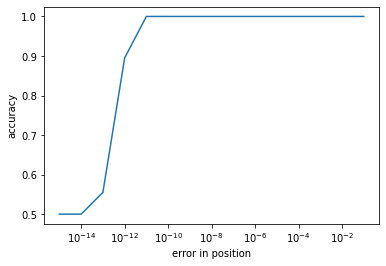

dt = 0.0001, number of steps = 10000.0


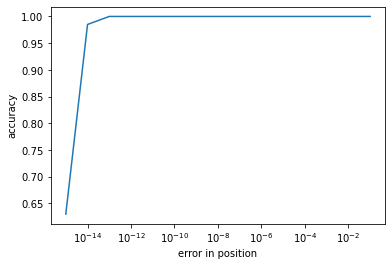

dt = 0.0002, number of steps = 5000.0


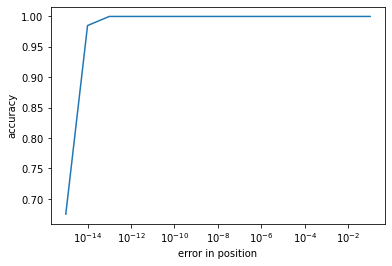

dt = 1e-05, number of steps = 99999.99999999999


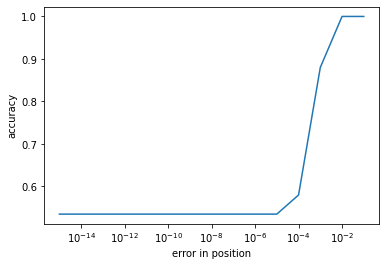

dt = 2e-05, number of steps = 49999.99999999999


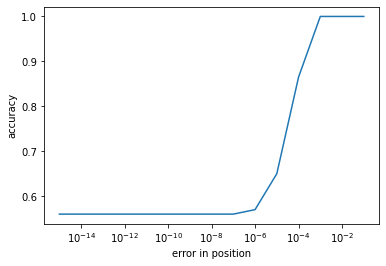

In [126]:
for x in dataArray:
    _dt = x[0]
    _errror_accuracy = x[1]
    print(f"dt = {_dt}, number of steps = {1/_dt}")
    plt.ylabel("accuracy")
    plt.xlabel("error in position")
    plt.xscale("log")
    plt.plot(*list(zip(*x[1])))
    plt.show()